# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [55]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

    # if len(cities) == 587:
    #     break

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

In [60]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"



# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid=a2a58a3cd542c6b0675fec5018785011&units=metric"
    # Log the URL, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send a GET request to the API
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =  city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity'] 
        city_clouds =   city_weather['clouds']['all'] 
        city_wind = city_weather['wind']['speed'] 
        city_country =  city_weather['sys']['country'] 
        city_date =  city_weather['dt']               
        # Append the city information into the city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zambezi
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | kodiak
Processing Record 5 of Set 1 | metairie
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | karratha
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | vangviang
Processing Record 11 of Set 1 | enewetak
Processing Record 12 of Set 1 | namie
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | mitchell
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | villa gesell
Processing Record 17 of Set 1 | tondano
Processing Record 18 of Set 1 | khilok
Processing Record 19 of Set 1 | champerico
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | esmeraldas
Processing Record 22 of Set 1 | port-aux-francais
Processing Record 23 of Set 1 |

In [62]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
summary = city_data_df.count()
print(summary)

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64


In [63]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zambezi,-13.5432,23.1047,24.39,57,93,1.92,ZM,1736356022
1,hermanus,-34.4187,19.2345,21.00,67,6,2.89,ZA,1736356023
2,saldanha,-33.0117,17.9442,23.03,76,0,6.04,ZA,1736355834
3,kodiak,57.7900,-152.4072,0.73,86,0,0.00,US,1736356026
4,metairie,29.9841,-90.1528,4.00,73,75,5.14,US,1736355732


In [64]:
# Export the City_Data into a csv
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [65]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zambezi,-13.5432,23.1047,24.39,57,93,1.92,ZM,1736356022
1,hermanus,-34.4187,19.2345,21.00,67,6,2.89,ZA,1736356023
2,saldanha,-33.0117,17.9442,23.03,76,0,6.04,ZA,1736355834
3,kodiak,57.7900,-152.4072,0.73,86,0,0.00,US,1736356026
4,metairie,29.9841,-90.1528,4.00,73,75,5.14,US,1736355732


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

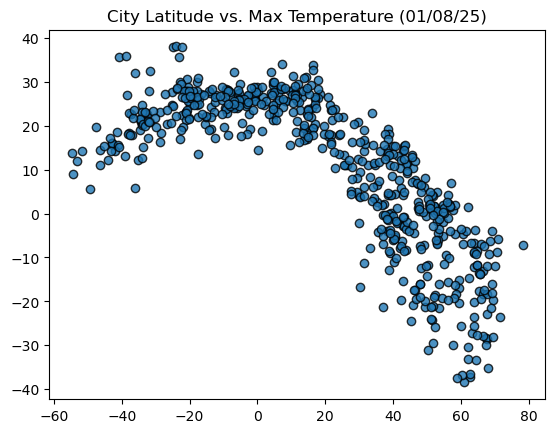

In [66]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

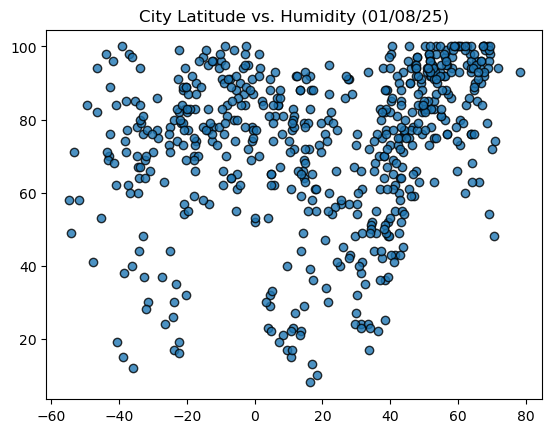

In [67]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

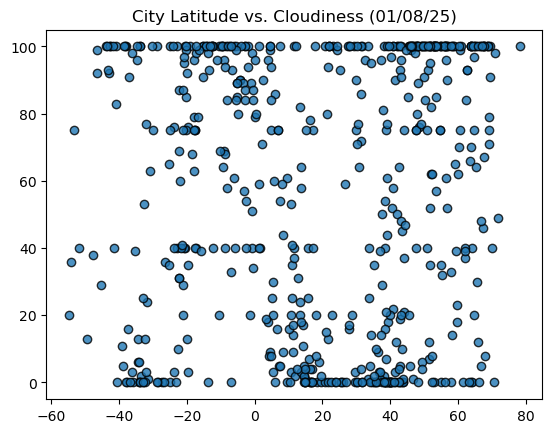

In [68]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

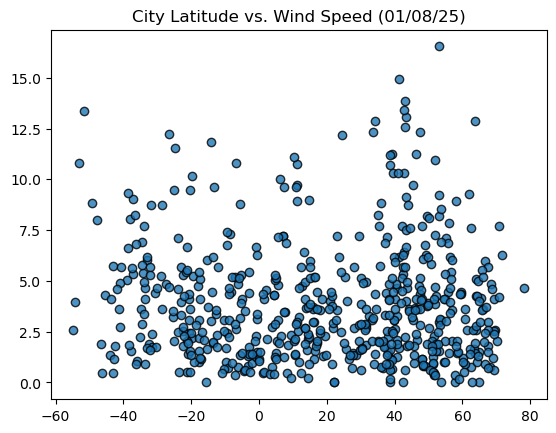

In [69]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    plt.title(f'Latitude vs. {title}')
    plt.show()

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kodiak,57.7900,-152.4072,0.73,86,0,0.00,US,1736356026
4,metairie,29.9841,-90.1528,4.00,73,75,5.14,US,1736355732
6,ilulissat,69.2167,-51.1000,-3.99,54,75,4.12,GL,1736356029
8,sitka,57.0531,-135.3300,6.94,87,100,2.06,US,1736356031
9,vangviang,18.9333,102.4500,14.96,73,6,1.29,LA,1736355825


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zambezi,-13.5432,23.1047,24.39,57,93,1.92,ZM,1736356022
1,hermanus,-34.4187,19.2345,21.00,67,6,2.89,ZA,1736356023
2,saldanha,-33.0117,17.9442,23.03,76,0,6.04,ZA,1736355834
5,waitangi,-43.9535,-176.5597,12.12,98,100,1.34,NZ,1736356028
7,karratha,-20.7377,116.8463,30.65,54,95,2.43,AU,1736356030


###  Temperature vs. Latitude Linear Regression Plot

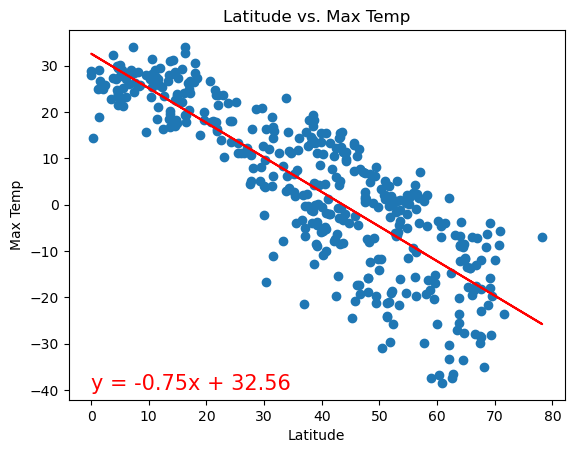

In [73]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
plot_linear_regression(x_values, northern_hemi_df["Max Temp"],"Max Temp",(0,-40))

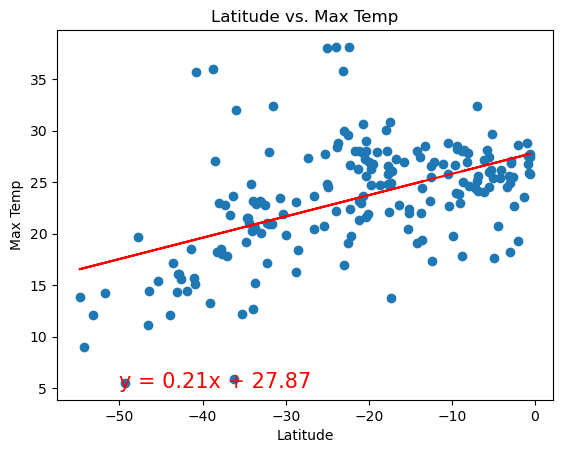

In [74]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
plot_linear_regression(x_values, southern_hemi_df["Max Temp"],"Max Temp",(-50,5))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

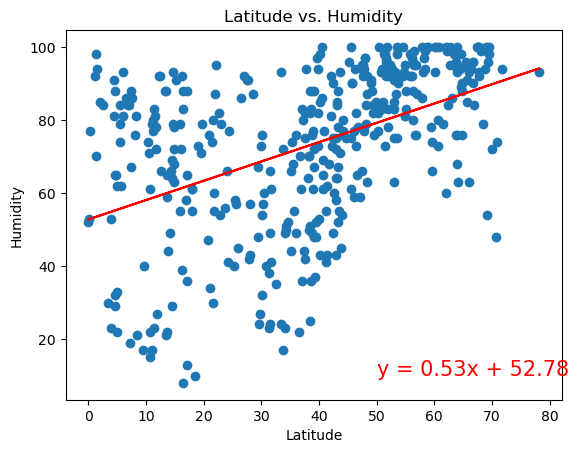

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
plot_linear_regression(x_values, northern_hemi_df["Humidity"],"Humidity",(50,10))

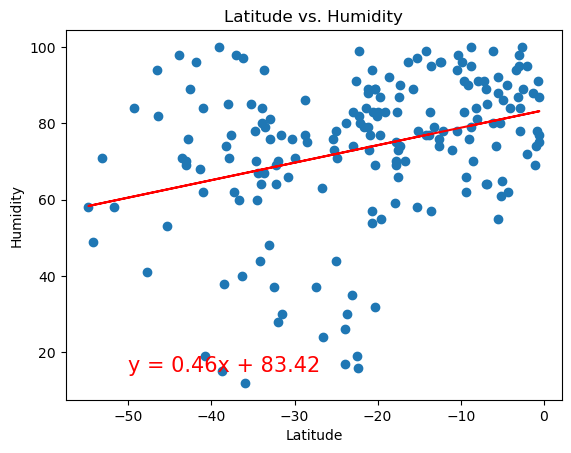

In [89]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
plot_linear_regression(x_values, southern_hemi_df["Humidity"],"Humidity",(-50,15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

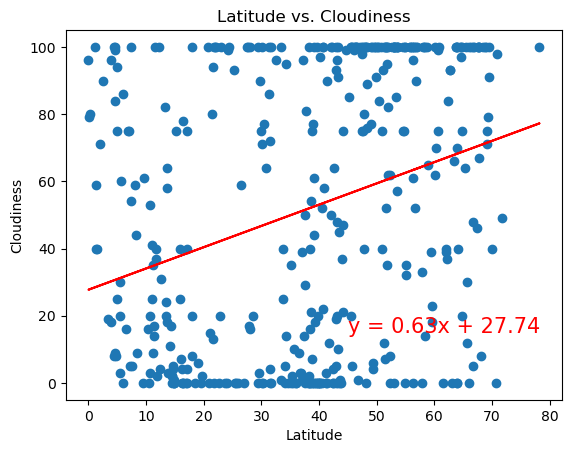

In [100]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
plot_linear_regression(x_values, northern_hemi_df["Cloudiness"],"Cloudiness",(45,15))

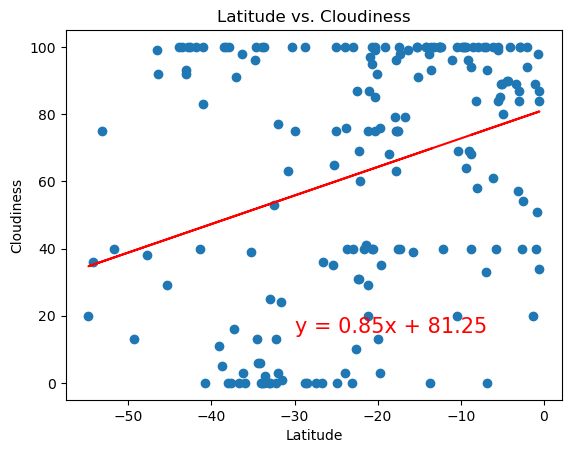

In [101]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
plot_linear_regression(x_values, southern_hemi_df["Cloudiness"],"Cloudiness",(-30,15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

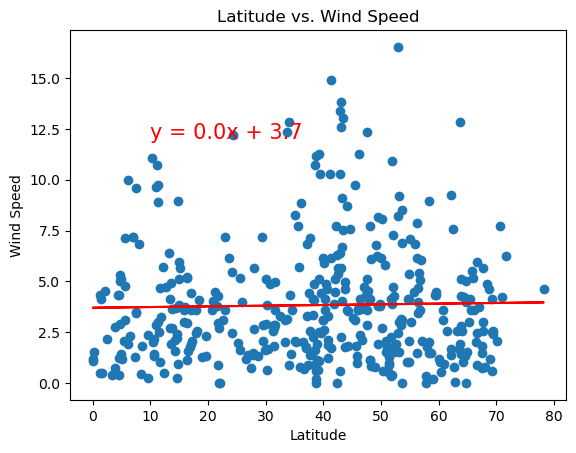

In [102]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
plot_linear_regression(x_values, northern_hemi_df["Wind Speed"],"Wind Speed",(10,12))

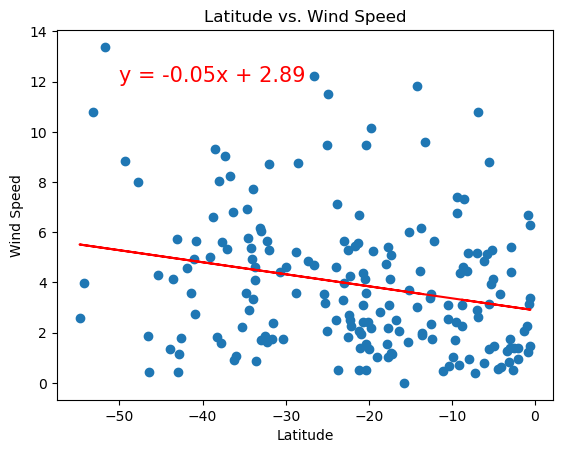

In [104]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
plot_linear_regression(x_values, southern_hemi_df["Wind Speed"],"Wind Speed",(-50,12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE